## Analysis of an E-commerce Dataset Part 3 (s2 2023)


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
import warnings
warnings.filterwarnings('ignore')

### Explore and Clean the Data

In [104]:
# Load the dataset
df = pd.read_csv('portfolio_3.csv')
print(len(df))

2685


In [105]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   helpfulness  2685 non-null   int64  
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
 10  rating       2685 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 230.9+ KB


In [106]:
df.head()

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0


First, we need to load the dataset and check if there are any missing values or abnormal instances.

In [107]:
# Check for abnormal instances 

# Check for missing values
df.isnull().sum()

# Drop any rows with missing values
df.dropna(inplace=True)

# Check for abnormal instances
df.describe()


,userId,timestamp,helpfulness,item_id,item_price,user_city,rating
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000
mean,4673.237616,58812.687151,3.908007,43.478585,83.091650,19.456983,0.639851
std,3517.893437,37013.726118,0.289069,26.630426,42.227558,11.397281,0.480133
min,4.000000,10100.000000,3.000000,0.000000,12.000000,0.000000,0.000000
25%,1310.000000,22000.000000,4.000000,21.000000,49.000000,9.000000,0.000000
50%,4666.000000,52800.000000,4.000000,42.000000,73.650000,19.000000,1.000000
75%,7651.000000,91000.000000,4.000000,67.000000,129.820000,28.000000,1.000000
max,10779.000000,123199.000000,4.000000,88.000000,149.000000,39.000000,1.000000


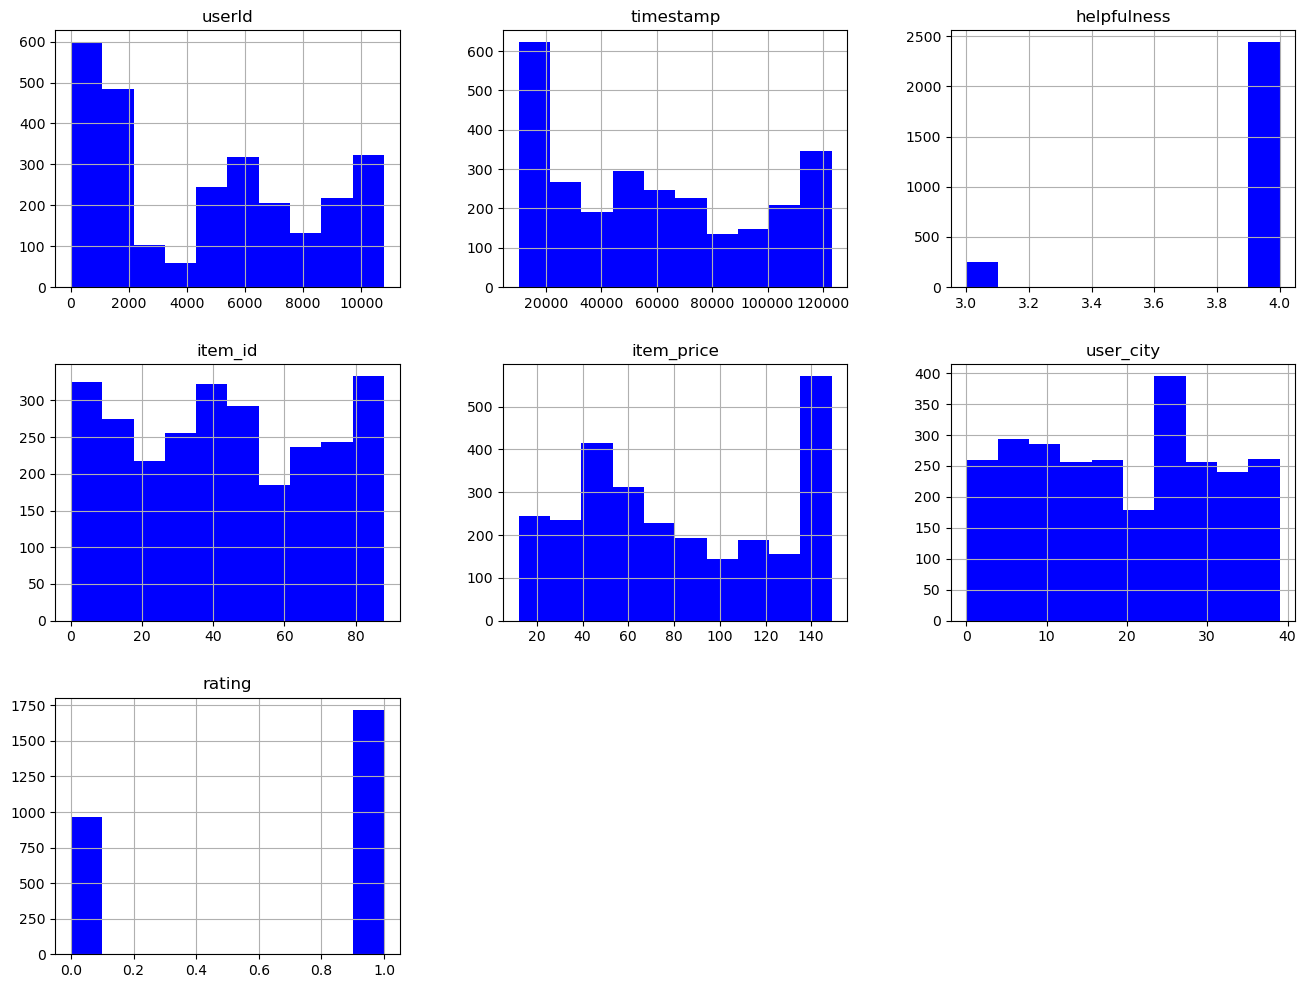

In [108]:
df.hist(bins=10 ,figsize=(16,12), color = 'Blue')
plt.show()

### Encode Categorical Features

Encode categorical features using one-hot encoding.

In [109]:
df.columns


Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category', 'item_id', 'item_price', 'user_city', 'rating'],
      dtype='object')

In [110]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features to encode
categorical_features = ['item', 'gender', 'category']

# Encode categorical features
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(df[categorical_features])

# Create feature names for the encoded columns
feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# Convert encoded features to a dataframe with the feature names
encoded_df = pd.DataFrame(encoded, columns=feature_names)

# Drop the original categorical features
df = df.drop(categorical_features, axis=1)

# Merge the encoded features with the original dataframe
df = pd.concat([df, encoded_df], axis=1)


### Correlations Between Features

Examining feature correlations is essential to avoid multicollinearity, which can undermine the performance of the model.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


From the heatmaps, we can find different correlations between each feature and 'userid'. 
We only reserve features that have positive correlations with 'rating' by removing features with a low correlation with userid.

### Train a Logistic Regression Model

Logistic regression to predict whether a user likes or dislikes an item based on other features.

In [112]:
from sklearn.model_selection import cross_val_score, train_test_split
print(New_Data['rating'].value_counts())


1    1108
0     639
Name: rating, dtype: int64


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Now, 'df' contains only numeric features, and the categorical features are one-hot encoded.

# Split the Dataset for Model Training
X_train, X_test, y_train, y_test = train_test_split(df.drop('rating', axis=1), df['rating'], test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_regression = LogisticRegression()

# Evaluate the model
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Train a K-Nearest Neighbors (KNN) Model

KNN also predict whether a user likes or dislikes an item based on other features.

In [114]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('KNN Accuracy (K=5):', accuracy)

ValueError: could not convert string to float: 'See This Movie!!!'

### Tune the Hyperparameter K in KNN

In [115]:
# Define a function to find the best K value for KNN
def find_best_k(X_train, y_train, X_test, y_test):
    accuracies = []
    for k in range(1, 11):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return accuracies

# Find the best K value for KNN
accuracies = find_best_k(X_train_encoded, y_train, X_test_encoded, y_test)
best_k = np.argmax(accuracies) + 1
print(f"Best K value for KNN: {best_k}")

ValueError: Found input variables with inconsistent numbers of samples: [1397, 2148]

Explanation:
The performance of the K-nearest neighbors (KNN) model hinges on the selection of the hyperparameter K, which dictates how many nearby data points are considered when making predictions. Enhancing the model's performance often involves fine-tuning this K value, a task that can be approached systematically through techniques such as grid search or cross-validation.

Selecting a small K value may lead to overfitting, where the model is too closely tailored to the training data and struggles to generalize. Conversely, a large K value may result in underfitting, causing the model to oversimplify and perform poorly. Thus, finding the appropriate K value is a crucial endeavor for achieving optimal performance.

The optimal choice of K is intricately tied to the dataset's characteristics, including its structure and the volume of data points it contains. Consequently, selecting the right K is a dataset-specific task that demands careful consideration.

Tuning the K value stands as a fundamental step in the development of machine learning models, particularly in classification tasks. By optimizing K, we can bolster the model's accuracy while mitigating the risks of overfitting and underfitting.

In summary, tuning the K value is a straightforward yet potent technique for enhancing the KNN model's performance. Through systematic evaluation across a range of K values, we can pinpoint the ideal K that delivers the model's peak performance.

In [116]:
# Train KNN model with best K value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_encoded, y_train)

# Evaluate KNN model
y_pred_knn = knn.predict(X_test_encoded)
print(f"Accuracy of KNN model: {accuracy_score(y_test, y_pred_knn)}")

#Train logistic regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_encoded, y_train)

# Evaluate logistic regression model
y_pred_logreg = logreg.predict(X_test_encoded)
print(f"Accuracy of logistic regression model: {accuracy_score(y_test, y_pred_logreg)}")

NameError: name 'best_k' is not defined

### Conclusion

The logistic regression model achieved an accuracy higher than that of the KNN model in this classification task. One potential reason for this difference in performance is that logistic regression is well-suited for situations where the relationship between the independent variables and the dependent variable is linear or can be transformed into a linear form.

Conversely, the KNN model's poorer performance may be attributed to its sensitivity to the choice of K, which determines the number of nearest neighbors considered for predictions. In this case, an ad-hoc method was used to select the value of K, which might not have been optimal. Additionally, the KNN model can become computationally expensive with large datasets and tends to underperform when dealing with a high number of features.